# Exercise 2

## Setup

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial.distance import cdist
import seaborn as sns
import math
import statistics

In [2]:
birds = pd.read_csv('./birds2025.csv', sep=';')
birds.head()

,species,group,length,wspan,weight,AR,wload,back,belly,ftype
0,naurulokki,laridae,34-38,86-99,200-350,8.13,0.31,light grey,white,B
1,harmaalokki,laridae,55-65,123-148,800-1300,8.24,0.64,bluish grey,white,B
2,isolokki,laridae,63-68,138-158,1000-1800,8.24,0.66,bluish grey,white,B
3,kalatiira,sternidae,36-42,70-80,100-145,9.14,0.24,grey,white,B
4,lapintiira,sternidae,33-37,66-77,90-130,8.97,0.20,grey,white,B


## Tasks

### Subtask a

Replace interval columns with mean values.

In [3]:
def meanval(a: str) -> float:
    a_split = a.split('-')
    return (float(a_split[0]) + float(a_split[1])) / 2

In [4]:
birds['mean_length'] = birds['length'].apply(lambda x: meanval(x))
birds['mean_wspan'] = birds['wspan'].apply(lambda x: meanval(x))
birds['mean_weight'] = birds['weight'].apply(lambda x: meanval(x))
birds.drop(columns=['length', 'wspan', 'weight'], inplace=True)
birds.head()

,species,group,AR,wload,back,belly,ftype,mean_length,mean_wspan,mean_weight
0,naurulokki,laridae,8.13,0.31,light grey,white,B,36.0,92.5,275.0
1,harmaalokki,laridae,8.24,0.64,bluish grey,white,B,60.0,135.5,1050.0
2,isolokki,laridae,8.24,0.66,bluish grey,white,B,65.5,148.0,1400.0
3,kalatiira,sternidae,9.14,0.24,grey,white,B,39.0,75.0,122.5
4,lapintiira,sternidae,8.97,0.20,grey,white,B,35.0,71.5,110.0


Compute BMI and WSI

In [5]:
birds['BMI'] = (birds['mean_weight'] / 1000) / (birds['mean_length'] / 100) ** 2
birds.head()

,species,group,AR,wload,back,belly,ftype,mean_length,mean_wspan,mean_weight,BMI
0,naurulokki,laridae,8.13,0.31,light grey,white,B,36.0,92.5,275.0,2.121914
1,harmaalokki,laridae,8.24,0.64,bluish grey,white,B,60.0,135.5,1050.0,2.916667
2,isolokki,laridae,8.24,0.66,bluish grey,white,B,65.5,148.0,1400.0,3.263213
3,kalatiira,sternidae,9.14,0.24,grey,white,B,39.0,75.0,122.5,0.805391
4,lapintiira,sternidae,8.97,0.20,grey,white,B,35.0,71.5,110.0,0.897959


In [6]:
birds['WSI'] = birds['mean_wspan'] / birds['mean_length']
birds.head()

,species,group,AR,wload,back,belly,ftype,mean_length,mean_wspan,mean_weight,BMI,WSI
0,naurulokki,laridae,8.13,0.31,light grey,white,B,36.0,92.5,275.0,2.121914,2.569444
1,harmaalokki,laridae,8.24,0.64,bluish grey,white,B,60.0,135.5,1050.0,2.916667,2.258333
2,isolokki,laridae,8.24,0.66,bluish grey,white,B,65.5,148.0,1400.0,3.263213,2.259542
3,kalatiira,sternidae,9.14,0.24,grey,white,B,39.0,75.0,122.5,0.805391,1.923077
4,lapintiira,sternidae,8.97,0.20,grey,white,B,35.0,71.5,110.0,0.897959,2.042857


Split dataset.

In [7]:
birds.set_index('species', inplace=True)
groups = birds["group"]
birds.drop(columns=['group'], inplace=True)
birds.head()

,AR,wload,back,belly,ftype,mean_length,mean_wspan,mean_weight,BMI,WSI
species,,,,,,,,,,
naurulokki,8.13,0.31,light grey,white,B,36.0,92.5,275.0,2.121914,2.569444
harmaalokki,8.24,0.64,bluish grey,white,B,60.0,135.5,1050.0,2.916667,2.258333
isolokki,8.24,0.66,bluish grey,white,B,65.5,148.0,1400.0,3.263213,2.259542
kalatiira,9.14,0.24,grey,white,B,39.0,75.0,122.5,0.805391,1.923077
lapintiira,8.97,0.20,grey,white,B,35.0,71.5,110.0,0.897959,2.042857


Assess numerical feature distribution.

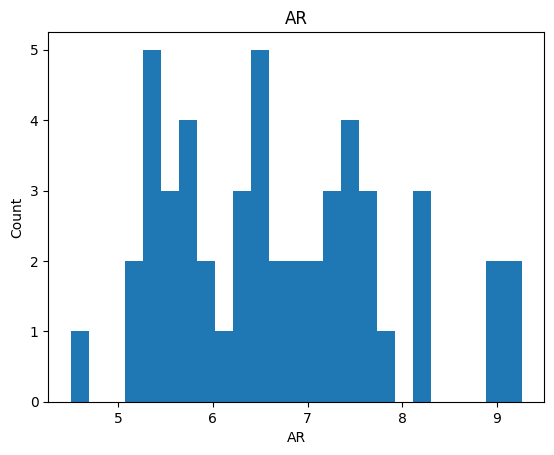

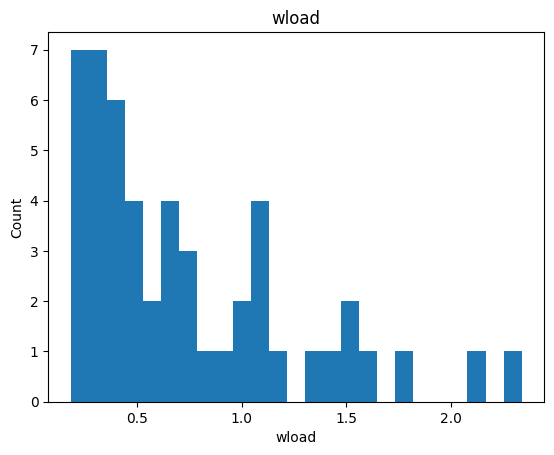

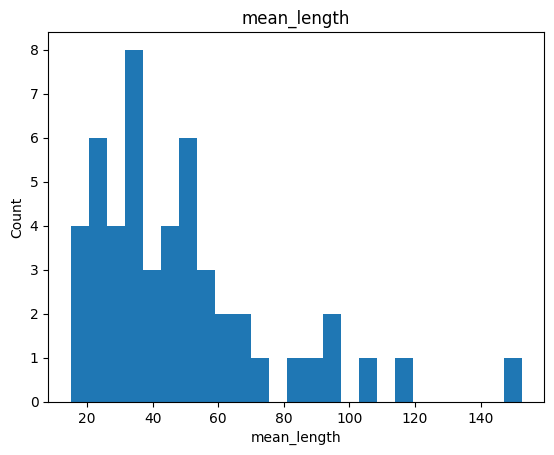

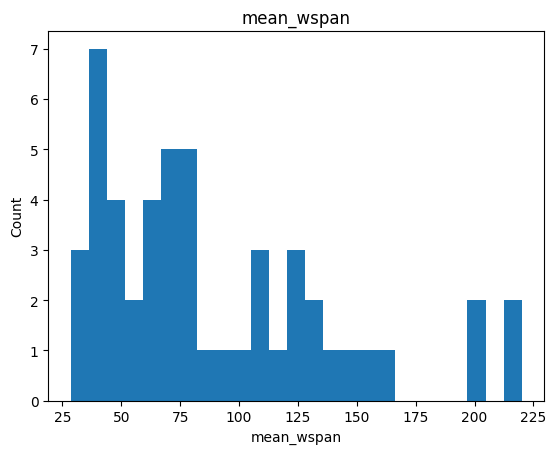

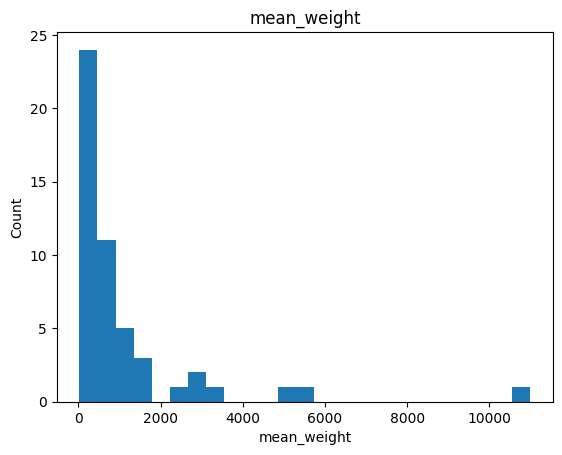

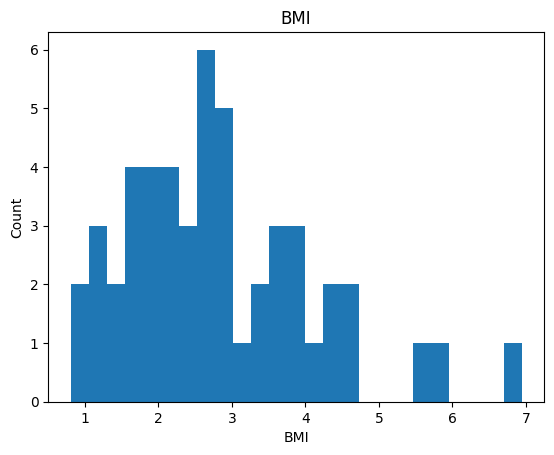

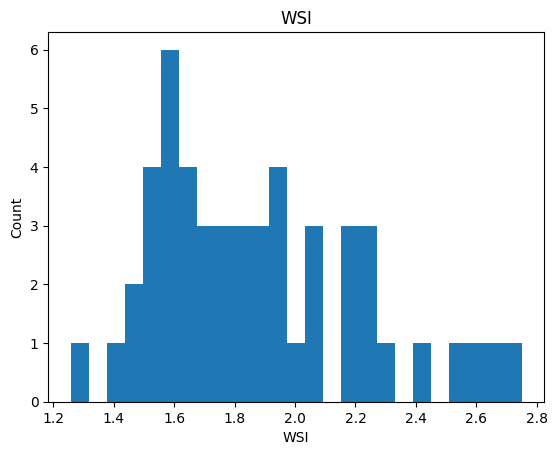

In [8]:
for i in birds.select_dtypes(include=['float64']).columns:
    plt.hist(birds[i], bins = 25)
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.show()

Scale numerical features.

In [9]:
scaler = MinMaxScaler()
num_cols = birds.select_dtypes(include=['float64']).columns
birds[num_cols] = pd.DataFrame(scaler.fit_transform(birds[num_cols]), columns=num_cols, index=birds.index)
birds.head()

,AR,wload,back,belly,ftype,mean_length,mean_wspan,mean_weight,BMI,WSI
species,,,,,,,,,,
naurulokki,0.762605,0.060185,light grey,white,B,0.152727,0.334204,0.022779,0.214481,0.879054
harmaalokki,0.785714,0.212963,bluish grey,white,B,0.327273,0.558747,0.093394,0.343958,0.670654
isolokki,0.785714,0.222222,bluish grey,white,B,0.367273,0.624021,0.125285,0.400416,0.671464
kalatiira,0.974790,0.027778,grey,white,B,0.174545,0.242820,0.008884,0.000000,0.446080
lapintiira,0.939076,0.009259,grey,white,B,0.145455,0.224543,0.007745,0.015081,0.526316


Pairwise distances based on numerical features.

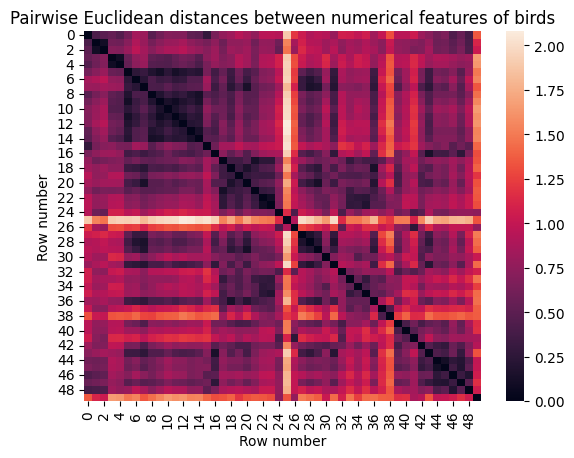

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000000,0.412240,0.494961,0.537179,0.458502,0.614269,0.844823,0.798031,0.483868,0.602311,...,0.945243,1.045541,0.806295,0.720158,0.606286,0.658066,0.431060,0.557765,0.378187,1.351111
1,0.412240,0.000000,0.100755,0.607504,0.588298,0.713402,0.894036,0.788759,0.624433,0.722079,...,0.742517,0.708791,0.667645,0.790164,0.580133,0.601454,0.489592,0.597813,0.404217,1.111911
2,0.494961,0.100755,0.000000,0.693322,0.678988,0.793716,0.963168,0.843763,0.709864,0.806920,...,0.745752,0.656002,0.676412,0.849024,0.604778,0.625901,0.522463,0.646808,0.425812,1.036811
3,0.537179,0.607504,0.693322,0.000000,0.097289,0.558724,0.747743,0.806091,0.517132,0.479969,...,0.941824,1.122554,0.982712,0.819173,0.906038,0.893173,0.843769,0.772793,0.819415,1.658097
4,0.458502,0.588298,0.678988,0.097289,0.000000,0.527917,0.735403,0.788746,0.468235,0.450379,...,0.953783,1.136505,0.960636,0.781061,0.860565,0.856511,0.783774,0.727560,0.761523,1.634855
5,0.614269,0.713402,0.793716,0.558724,0.527917,0.000000,0.243948,0.302904,0.182761,0.112892,...,0.828375,1.069008,0.626720,0.334024,0.616545,0.584045,0.690634,0.476636,0.792848,1.488891
6,0.844823,0.894036,0.963168,0.747743,0.735403,0.243948,0.000000,0.226925,0.414222,0.317034,...,0.825348,1.103945,0.639994,0.325780,0.701961,0.642132,0.841146,0.566475,0.969449,1.545433
7,0.798031,0.788759,0.843763,0.806091,0.788746,0.302904,0.226925,0.000000,0.412983,0.403661,...,0.741083,0.959467,0.423306,0.253123,0.543506,0.481634,0.720250,0.465289,0.857201,1.340114
8,0.483868,0.624433,0.709864,0.517132,0.468235,0.182761,0.414222,0.412983,0.000000,0.182537,...,0.905566,1.088247,0.646703,0.434527,0.607821,0.603690,0.630586,0.503395,0.708963,1.453638
9,0.602311,0.722079,0.806920,0.479969,0.450379,0.112892,0.317034,0.403661,0.182537,0.000000,...,0.889452,1.125469,0.717948,0.437411,0.699389,0.671926,0.745136,0.554984,0.826393,1.556032


In [10]:
cdist_matrix = cdist(birds[num_cols], birds[num_cols], metric='euclidean')
sns.heatmap(cdist_matrix)
plt.title('Pairwise Euclidean distances between numerical features of birds')
plt.xlabel('Row number')
plt.ylabel('Row number')
plt.show()
display(pd.DataFrame(cdist_matrix))

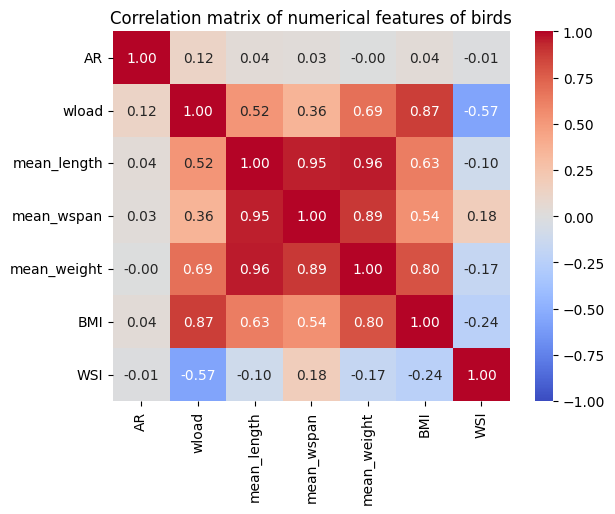

In [11]:
# Numerical feature correlations
corr = birds[num_cols].corr(method="spearman")
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix of numerical features of birds')
plt.show()

In [12]:
birds = birds.drop(columns=["mean_length"])
num_cols = birds.select_dtypes(include=['float64']).columns

### Subtask b

Identify categorical features.

In [13]:
categ_cols = birds.select_dtypes(include=['object']).columns

Defining distance measure for color features.

In [14]:
main_colors = ['black', 'white', 'brown', 'grey', 'beige']

def split_color(a: str) -> list:
    if '-' in a:
        a_split = a.split('-')
    elif ' ' in a:
        a_split = a.split(' ')
    else:
        a_split = [a]
    return a_split

def color_similarity(a: str, b: str) -> float:
    a_split = split_color(a)
    b_split = split_color(b)

    intersection = set(a_split).intersection(set(b_split))
    
    if a_split == b_split: # exact match
        return 1.0
    elif any(i_color in main_colors for i_color in intersection): # same main color
        return 0.5
    else: # no match
        return 0.0


Overlap distance.

In [15]:
def get_categ_dist(row1, row2) -> float:
    sim = 0.0

    for col in categ_cols:
        sim += color_similarity(row1[col], row2[col])

    return 1-(sim / len(categ_cols))


Combined pairwise distance (numerical + categorical).

In [16]:
def l2(row_1, row_2):
    sum_of_squares = 0
    for col in num_cols:
        sum_of_squares += abs(row_1[col] - row_2[col]) ** 2
    dist = math.sqrt(sum_of_squares)
    return dist

def calculate_pairwise_distance(df, distance_function):
    num_rows = len(df)
    distances = [[0.0] * num_rows for _ in range(num_rows)]
    for i in range(num_rows):
        for j in range(num_rows): #Calculating 2 times, just to doublecheck
            row_1 = df.iloc[i]
            row_2 = df.iloc[j]

            dist = distance_function(row_1, row_2)
            distances[i][j] = dist

    return pd.DataFrame(distances)

def create_distance_list(distances):
    distances_list = []
    for i in range(len(distances)):
        for j in range(i + 1, len(distances)):
            distances_list.append(distances.iloc[i, j])
    return distances_list

def get_std_dev(distance_list):
    std_dev = statistics.stdev(distance_list)
    print(f"Standard deviation of the distances: {std_dev}")
    return std_dev

In [17]:
# Numerical features
pairwise_distances = calculate_pairwise_distance(birds, l2)

l2_distance_list = create_distance_list(pairwise_distances)

l2_std = get_std_dev(l2_distance_list)

Standard deviation of the distances: 0.31935723783892983


In [18]:
# Categorical features
categ_pairwise = calculate_pairwise_distance(birds, get_categ_dist)

categ_std = get_std_dev(create_distance_list(categ_pairwise))


Standard deviation of the distances: 0.2534869388690408


In [19]:
def mixed_metric(row1, row2):
    lambda_ = 0.8
    return lambda_*l2(row1, row2)/l2_std+(1-lambda_)*get_categ_dist(row1, row2)/categ_std

In [20]:
mixed_distances = calculate_pairwise_distance(birds, mixed_metric)
mixed_distances.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000000,1.067040,1.248858,1.476038,1.279917,2.052823,2.634448,2.788005,1.712886,2.014624,...,2.241334,2.798208,2.510961,2.461423,2.148025,2.267237,1.842521,2.036032,1.684309,4.032915
1,1.067040,0.000000,0.231652,1.604440,1.533056,2.198915,2.678221,2.711650,1.933140,2.200846,...,2.010315,2.076380,2.197252,2.583768,2.103421,2.161926,1.998955,2.140307,1.793508,3.523801
2,1.248858,0.231652,0.000000,1.799843,1.739062,2.375921,2.828945,2.828302,2.122370,2.389379,...,2.052152,1.980289,2.212477,2.710457,2.152387,2.214777,2.062792,2.247895,1.831073,3.350709
3,1.476038,1.604440,1.799843,0.000000,0.232563,1.903838,2.384083,2.806963,1.786068,1.690151,...,2.390302,3.045942,2.835490,2.708256,2.914759,2.874636,2.894798,2.585616,2.825748,4.841463
4,1.279917,1.533056,1.739062,0.232563,0.000000,1.837072,2.360893,2.764829,1.676622,1.630988,...,2.387537,3.048038,2.768830,2.614079,2.790876,2.770329,2.735737,2.463386,2.668237,4.764438


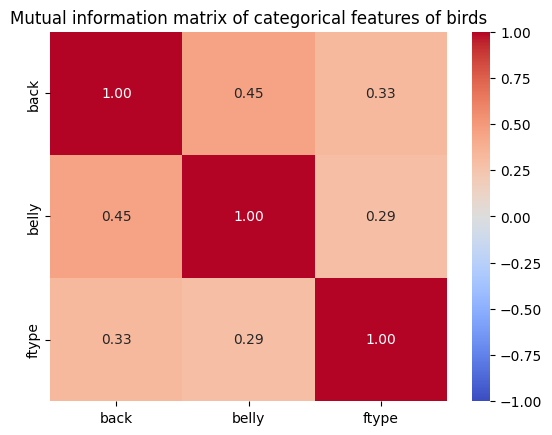

In [21]:
# Mutual information between categorical features
from sklearn.metrics import normalized_mutual_info_score

categ_data = birds[categ_cols].astype('category').apply(lambda x: x.cat.codes)
corr = categ_data.corr(method=normalized_mutual_info_score)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mutual information matrix of categorical features of birds')
plt.show()

### Subtask c

In [22]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import normalized_mutual_info_score, adjusted_mutual_info_score, rand_score, adjusted_rand_score

In [23]:
mixed_distances = calculate_pairwise_distance(birds, mixed_metric)
mixed_distances.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.000000,1.067040,1.248858,1.476038,1.279917,2.052823,2.634448,2.788005,1.712886,2.014624,...,2.241334,2.798208,2.510961,2.461423,2.148025,2.267237,1.842521,2.036032,1.684309,4.032915
1,1.067040,0.000000,0.231652,1.604440,1.533056,2.198915,2.678221,2.711650,1.933140,2.200846,...,2.010315,2.076380,2.197252,2.583768,2.103421,2.161926,1.998955,2.140307,1.793508,3.523801
2,1.248858,0.231652,0.000000,1.799843,1.739062,2.375921,2.828945,2.828302,2.122370,2.389379,...,2.052152,1.980289,2.212477,2.710457,2.152387,2.214777,2.062792,2.247895,1.831073,3.350709
3,1.476038,1.604440,1.799843,0.000000,0.232563,1.903838,2.384083,2.806963,1.786068,1.690151,...,2.390302,3.045942,2.835490,2.708256,2.914759,2.874636,2.894798,2.585616,2.825748,4.841463
4,1.279917,1.533056,1.739062,0.232563,0.000000,1.837072,2.360893,2.764829,1.676622,1.630988,...,2.387537,3.048038,2.768830,2.614079,2.790876,2.770329,2.735737,2.463386,2.668237,4.764438


In [24]:
bird_map = {
    "charadriiformes": "1",
    "lari": "1.1",
    "laridae": "1.1.1",
    "sternidae": "1.1.2",
    "charadrii": "1.2",
    "scolopacidae": "1.2.1",
    "charadriidae": "1.2.2",
    "haematopodidae": "1.2.3",
    "anatidae": "2",
    "anatinae": "2.1",
    "dabbling ducks": "2.1.1",
    "diving ducks": "2.1.2",
    "anserinae": "2.2",
    "gruifores": "3",
    "gruidae": "3.1",
    "rallidae": "3.2",
    "phalacrocoracidae": "4",
    "podicipedidae": "5",
    "gaviidae": "6",
    "ardeidae": "7",
    "accipitriformes": "8",
    "accipitridae": "8.1"
}

In [25]:
birds['group'] = groups
birds['group_ID'] = birds['group'].map(bird_map)
birds

,AR,wload,back,belly,ftype,mean_wspan,mean_weight,BMI,WSI,group,group_ID
species,,,,,,,,,,,
naurulokki,0.762605,0.060185,light grey,white,B,0.334204,0.022779,0.214481,0.879054,laridae,1.1.1
harmaalokki,0.785714,0.212963,bluish grey,white,B,0.558747,0.093394,0.343958,0.670654,laridae,1.1.1
isolokki,0.785714,0.222222,bluish grey,white,B,0.624021,0.125285,0.400416,0.671464,laridae,1.1.1
kalatiira,0.974790,0.027778,grey,white,B,0.242820,0.008884,0.000000,0.446080,sternidae,1.1.2
lapintiira,0.939076,0.009259,grey,white,B,0.224543,0.007745,0.015081,0.526316,sternidae,1.1.2
suokukko,0.468487,0.083333,dappled brown,white,C,0.099217,0.007745,0.144386,0.405667,scolopacidae,1.2.1
taivaanvuohi,0.296218,0.101852,dappled brown,white,C,0.070496,0.006834,0.109788,0.239971,scolopacidae,1.2.1
lehtokurppa,0.247899,0.166667,dappled brown,dappled beige,C,0.164491,0.025513,0.274415,0.306220,scolopacidae,1.2.1
karikukko,0.569328,0.125000,black-brown,white,C,0.091384,0.007745,0.222778,0.527379,scolopacidae,1.2.1


In [26]:
def plot_dendrogram(model: AgglomerativeClustering, n_cluster, linkage, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]).astype(float)
    threshold = (linkage_matrix[-(n_cluster-1), 2] + linkage_matrix[-n_cluster, 2]) / 2
    dendrogram(linkage_matrix, color_threshold=threshold,  above_threshold_color='black', **kwargs)
    plt.axhline(y=threshold, color='r', linestyle='--')
    plt.title(f'Hierarchical clustering dendrogram\n(k={n_cluster}, linkage={linkage})')
    plt.xlabel('Sample biological group')
    plt.ylabel('Distance')
    plt.show()

In [27]:
def hier_clust(data, n_clusters, method):
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage=method, compute_distances=True, metric='precomputed')
    #model.fit(data)
    
    labels = model.fit_predict(data)
    plot_dendrogram(model, n_cluster=n_clusters, linkage=method, labels=birds['group_ID'], leaf_rotation=90)
    return labels

c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


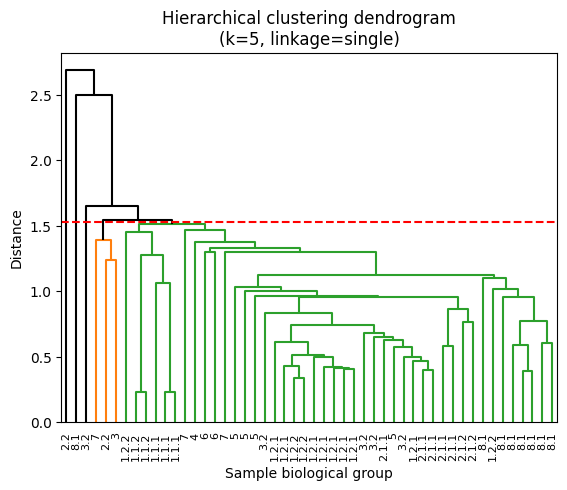

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 0 0 4 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 2]
Singletons:  3
k=5, method=single
Normalized Mutual Information Score: 0.30156518342246824
Adjusted Mutual Information Score: 0.09627597003086404
Rand Index: 0.28244897959183674
Adjusted Rand Index: 0.018052638634434067


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


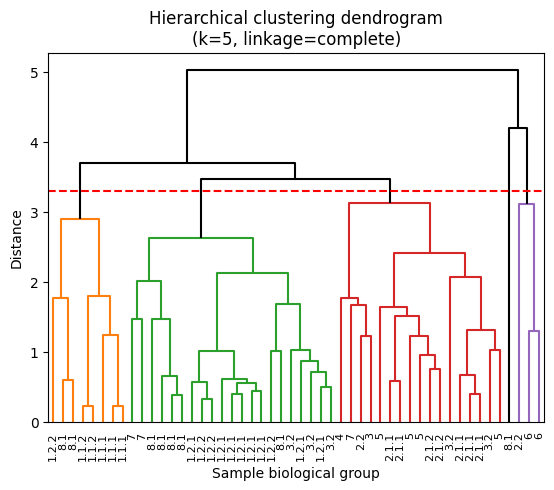

[3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 3 4 0 0 0 0 0 0 0 0 1 0 4 4 0 0 4 0 0 0 0 0
 1 1 4 4 0 4 4 4 4 3 4 3 2]
Singletons:  1
k=5, method=complete
Normalized Mutual Information Score: 0.5366785198310304
Adjusted Mutual Information Score: 0.37452103167323175
Rand Index: 0.7248979591836735
Adjusted Rand Index: 0.18732516639336355


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


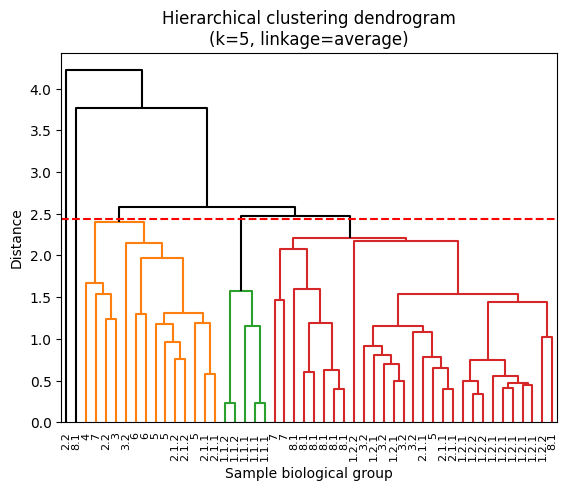

[4 4 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 3 0 1 1 1 0 1 0 0 0 0 1
 0 0 1 1 0 1 1 1 1 1 1 1 2]
Singletons:  2
k=5, method=average
Normalized Mutual Information Score: 0.4773822082697815
Adjusted Mutual Information Score: 0.3110293765217581
Rand Index: 0.6285714285714286
Adjusted Rand Index: 0.13148049171566006


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


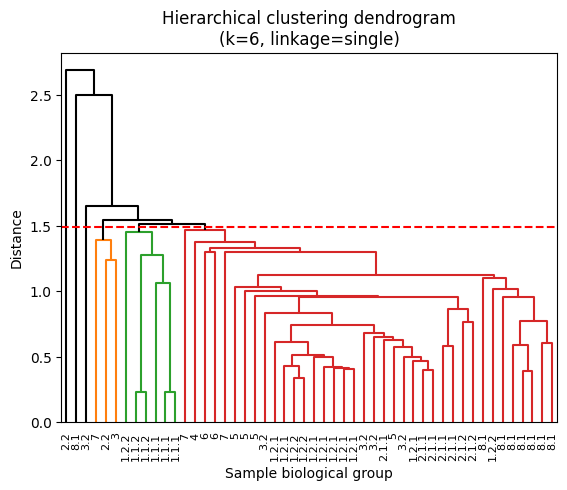

[2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 1 3 1 0 0 0 4 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 5]
Singletons:  3
k=6, method=single
Normalized Mutual Information Score: 0.44196630819609656
Adjusted Mutual Information Score: 0.24035336558324288
Rand Index: 0.4636734693877551
Adjusted Rand Index: 0.06628389517366835


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


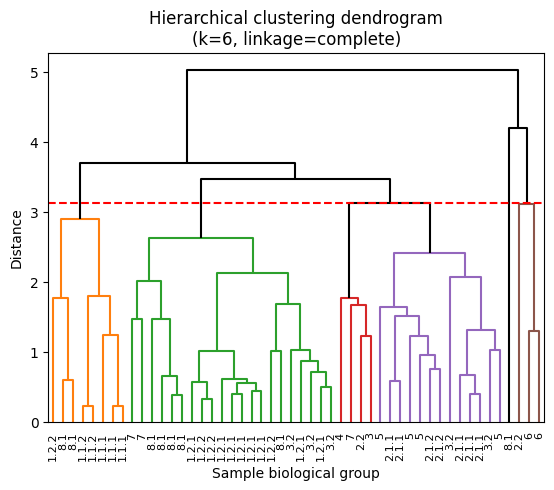

[1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 1 4 3 3 3 3 3 3 3 2 0 2 4 4 3 3 4 2 3 3 3 3
 0 0 4 4 2 4 4 4 4 1 4 1 5]
Singletons:  1
k=6, method=complete
Normalized Mutual Information Score: 0.5993320423291778
Adjusted Mutual Information Score: 0.4287967555481969
Rand Index: 0.7673469387755102
Adjusted Rand Index: 0.23180592991913745


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


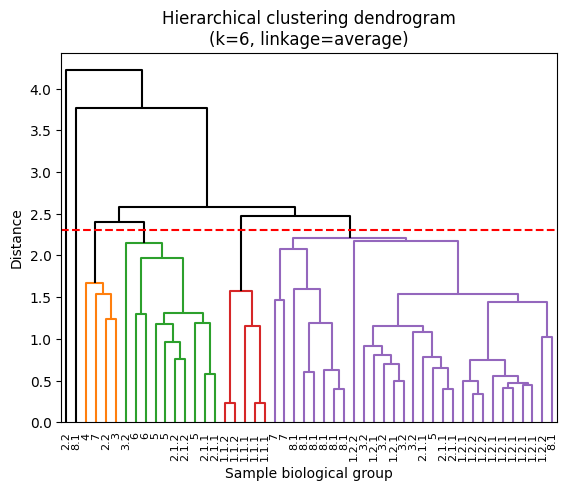

[4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 2 3 2 0 0 0 1 0 2 1 1 1 0
 1 1 0 0 2 0 0 0 0 0 0 0 5]
Singletons:  2
k=6, method=average
Normalized Mutual Information Score: 0.5400199281962778
Adjusted Mutual Information Score: 0.3580270829149895
Rand Index: 0.6612244897959184
Adjusted Rand Index: 0.15354491311087543


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


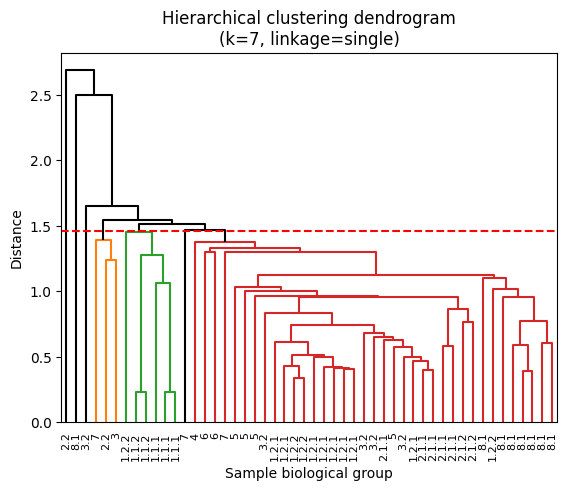

[0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 1 3 1 2 2 2 4 2 2 2 2 2 2
 2 2 2 6 1 2 2 2 2 2 2 2 5]
Singletons:  4
k=7, method=single
Normalized Mutual Information Score: 0.4622760648151743
Adjusted Mutual Information Score: 0.24631018401828977
Rand Index: 0.4922448979591837
Adjusted Rand Index: 0.07517544903056976


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


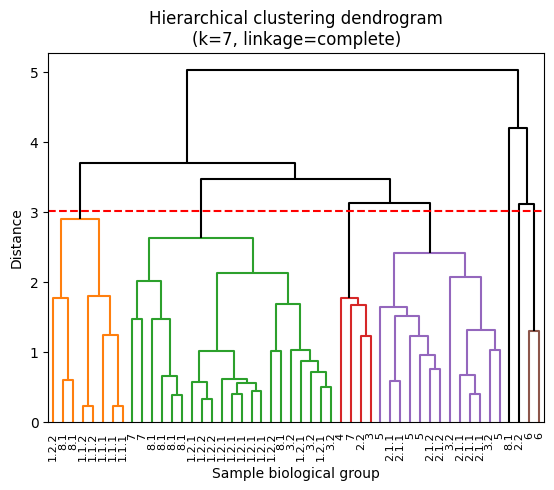

[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 3 3 3 3 3 3 3 2 6 2 1 1 3 3 1 2 3 3 3 3
 4 4 1 1 2 1 1 1 1 0 1 0 5]
Singletons:  2
k=7, method=complete
Normalized Mutual Information Score: 0.6115410850329862
Adjusted Mutual Information Score: 0.4350657726477231
Rand Index: 0.7689795918367347
Adjusted Rand Index: 0.2337268493447417


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


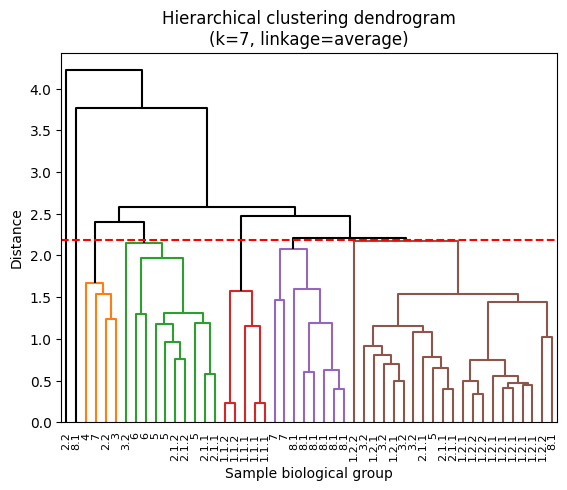

[4 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 6 3 6 0 0 0 1 0 6 1 1 1 0
 1 1 2 2 6 2 0 2 2 2 2 2 5]
Singletons:  2
k=7, method=average
Normalized Mutual Information Score: 0.6222848967279727
Adjusted Mutual Information Score: 0.4419913940841798
Rand Index: 0.7885714285714286
Adjusted Rand Index: 0.25821972734562953


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


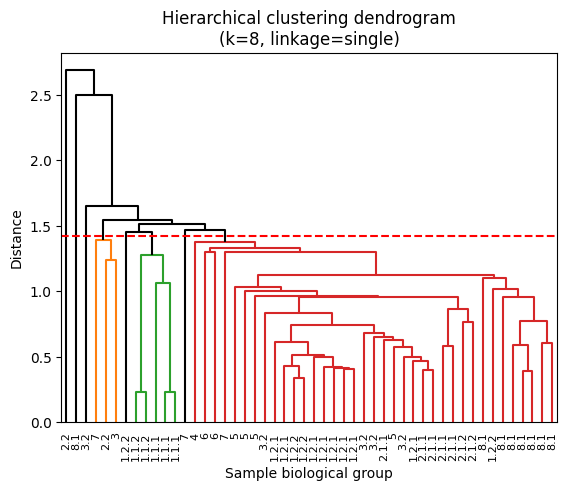

[1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 7 2 2 2 2 2 2 2 2 0 3 0 2 2 2 4 2 2 2 2 2 2
 2 2 2 6 0 2 2 2 2 2 2 2 5]
Singletons:  5
k=8, method=single
Normalized Mutual Information Score: 0.4840188880800516
Adjusted Mutual Information Score: 0.2557031882713454
Rand Index: 0.4963265306122449
Adjusted Rand Index: 0.07684481417200312


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


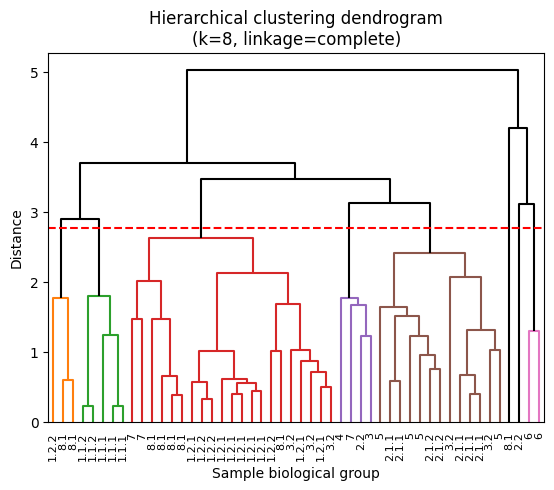

[3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 7 0 1 1 1 1 1 1 1 2 6 2 0 0 1 1 0 2 1 1 1 1
 4 4 0 0 2 0 0 0 0 7 0 7 5]
Singletons:  2
k=8, method=complete
Normalized Mutual Information Score: 0.6443146867537686
Adjusted Mutual Information Score: 0.4602581459435531
Rand Index: 0.7812244897959184
Adjusted Rand Index: 0.24871047320026912


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


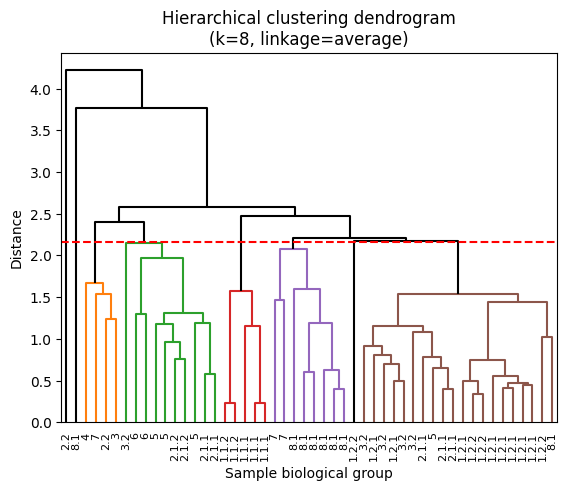

[1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 7 4 0 4 4 4 0 0 0 6 3 6 4 4 4 0 4 6 0 0 0 4
 0 0 2 2 6 2 4 2 2 2 2 2 5]
Singletons:  3
k=8, method=average
Normalized Mutual Information Score: 0.6245077310413629
Adjusted Mutual Information Score: 0.43021201187996333
Rand Index: 0.8
Adjusted Rand Index: 0.2628475147430497


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


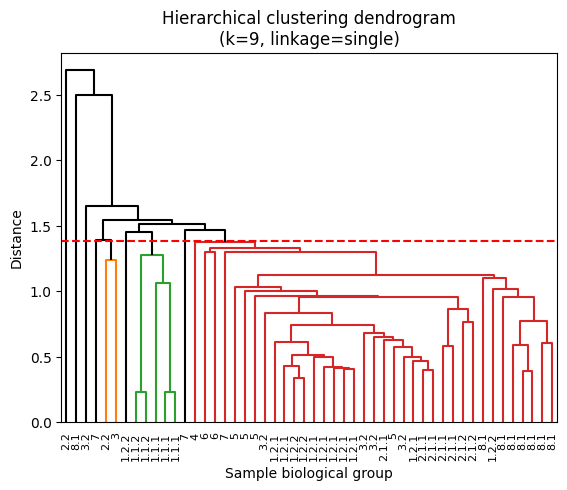

[1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 2 8 2 0 0 0 4 0 0 0 0 0 0
 0 0 0 6 3 0 0 0 0 0 0 0 5]
Singletons:  6
k=9, method=single
Normalized Mutual Information Score: 0.4988933484577946
Adjusted Mutual Information Score: 0.2606898472955285
Rand Index: 0.49795918367346936
Adjusted Rand Index: 0.07751844963100737


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


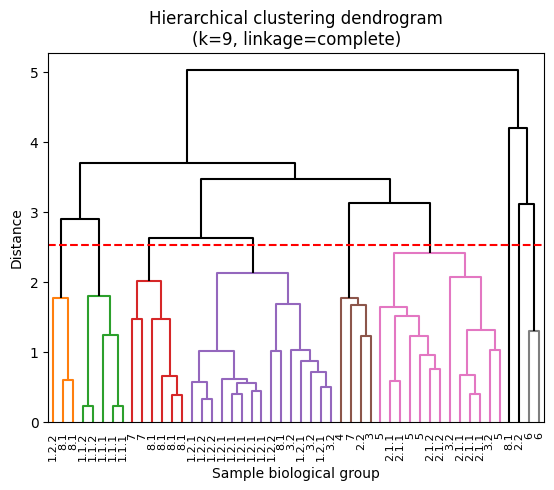

[8 8 8 8 8 1 1 1 1 1 1 1 1 1 1 7 1 0 0 0 0 0 0 0 2 6 2 1 1 0 0 1 2 0 0 0 0
 4 4 3 3 2 3 1 3 3 7 3 7 5]
Singletons:  2
k=9, method=complete
Normalized Mutual Information Score: 0.6932877505476742
Adjusted Mutual Information Score: 0.5082456583488848
Rand Index: 0.8481632653061224
Adjusted Rand Index: 0.3383608423449061


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


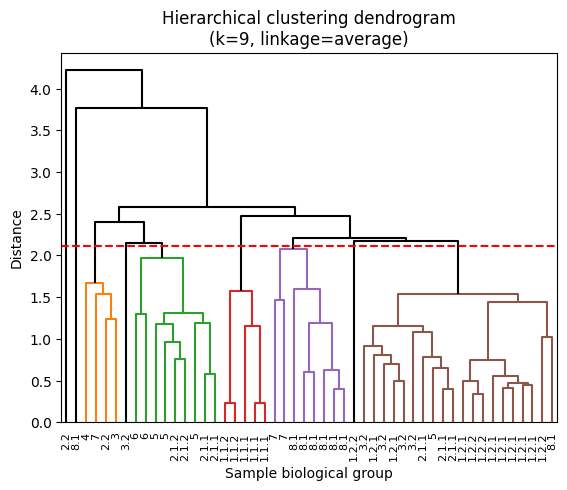

[1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 7 4 2 4 4 4 2 2 2 6 8 6 4 4 4 3 4 6 2 2 2 4
 2 2 0 0 6 0 4 0 0 0 0 0 5]
Singletons:  4
k=9, method=average
Normalized Mutual Information Score: 0.6442111682961524
Adjusted Mutual Information Score: 0.44557889390970423
Rand Index: 0.8073469387755102
Adjusted Rand Index: 0.2733990147783251


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


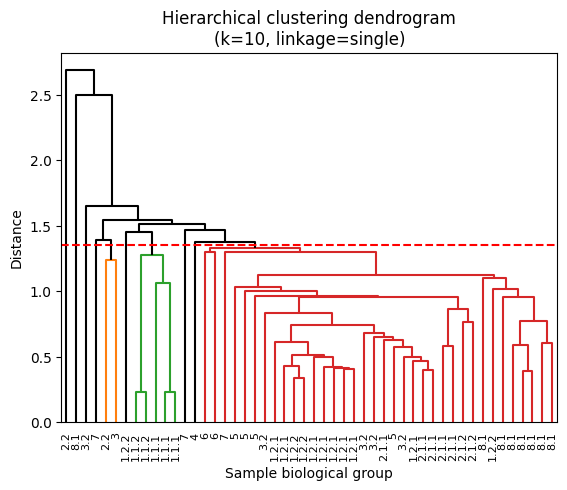

[1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 2 8 2 0 0 0 9 0 4 0 0 0 0
 0 0 0 6 3 0 0 0 0 0 0 0 5]
Singletons:  7
k=10, method=single
Normalized Mutual Information Score: 0.5332362841193196
Adjusted Mutual Information Score: 0.2924061388800712
Rand Index: 0.5273469387755102
Adjusted Rand Index: 0.09025202689962919


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


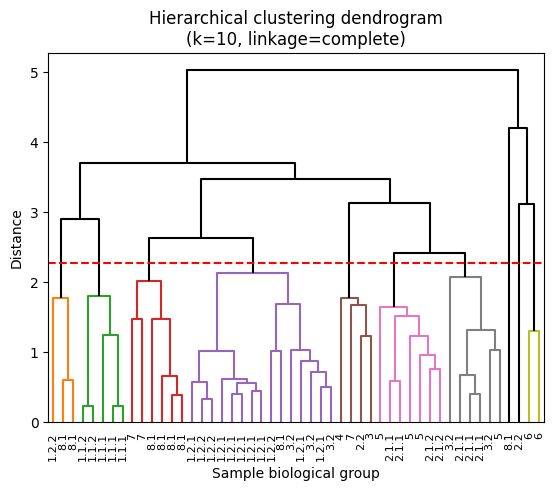

[8 8 8 8 8 0 0 0 0 0 0 0 0 0 0 7 0 4 1 1 1 4 4 4 2 6 2 0 0 1 1 0 2 4 4 4 1
 9 9 3 3 2 3 0 3 3 7 3 7 5]
Singletons:  2
k=10, method=complete
Normalized Mutual Information Score: 0.6920027949460276
Adjusted Mutual Information Score: 0.47932671835425544
Rand Index: 0.8677551020408163
Adjusted Rand Index: 0.3410348193947283


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


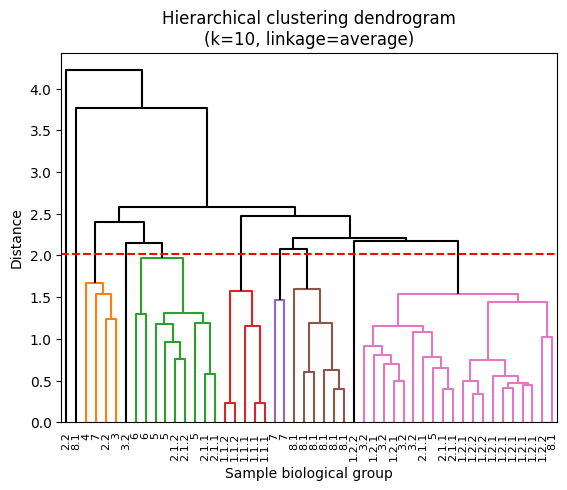

[1 1 1 1 1 4 4 4 4 4 4 4 4 4 4 7 4 0 4 4 4 0 0 0 2 8 2 4 4 4 3 4 2 0 0 0 4
 0 0 9 9 2 6 4 6 6 6 6 6 5]
Singletons:  4
k=10, method=average
Normalized Mutual Information Score: 0.6706503100705801
Adjusted Mutual Information Score: 0.467748843510454
Rand Index: 0.8171428571428572
Adjusted Rand Index: 0.28825622775800713


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


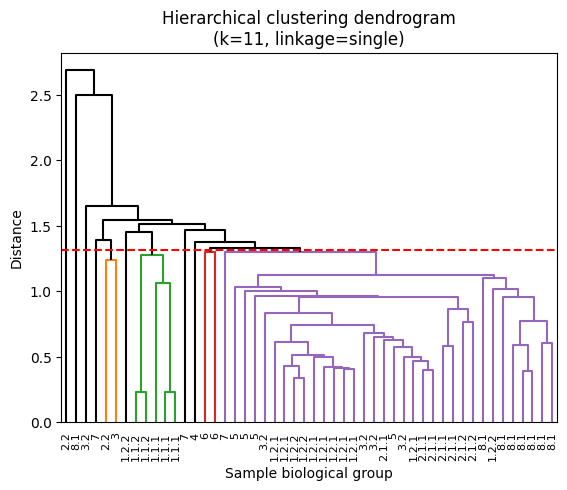

[ 4  4  4  4  4  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0
  2  8  2  0  0  0  9  0 10  0  0  0  0  1  1  0  6  3  0  0  0  0  0  0
  0  5]
Singletons:  7
k=11, method=single
Normalized Mutual Information Score: 0.586950696561407
Adjusted Mutual Information Score: 0.3504679492946031
Rand Index: 0.5828571428571429
Adjusted Rand Index: 0.1179313678105365


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


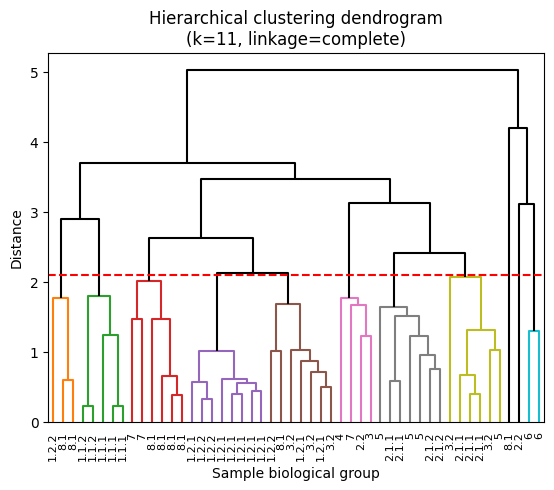

[ 3  3  3  3  3 10  8  8 10 10 10 10 10 10 10  7  8  4  0  0  0  4  4  4
  2  6  2  8  8  0  0  8  2  4  4  4  0  9  9  1  1  2  1  8  1  1  7  1
  7  5]
Singletons:  2
k=11, method=complete
Normalized Mutual Information Score: 0.6929014982331834
Adjusted Mutual Information Score: 0.45182762565834295
Rand Index: 0.8906122448979592
Adjusted Rand Index: 0.32595573440643866


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


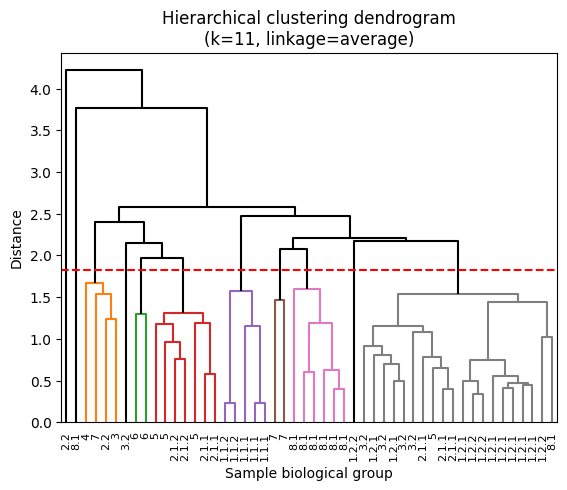

[ 1  1  1  1  1  4  4  4  4  4  4  4  4  4  4  7  4  6  4  4  4  6  6  6
  0  8  0  4  4  4  3  4  0  6  6  6  4 10 10  9  9  0  2  4  2  2  2  2
  2  5]
Singletons:  4
k=11, method=average
Normalized Mutual Information Score: 0.6977097217618219
Adjusted Mutual Information Score: 0.49301194136264453
Rand Index: 0.8285714285714286
Adjusted Rand Index: 0.3068391866913124


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


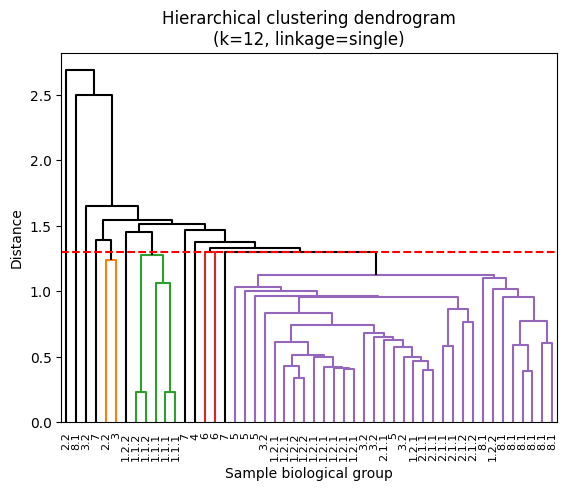

[ 1  1  1  1  1  4  4  4  4  4  4  4  4  4  4  7  4  4  4  4  4  4  4  4
  2  8  2  4  4  4  9  4 10  4  4  4  4  0  0 11  6  3  4  4  4  4  4  4
  4  5]
Singletons:  8
k=12, method=single
Normalized Mutual Information Score: 0.6163809388230801
Adjusted Mutual Information Score: 0.3807359727146781
Rand Index: 0.6097959183673469
Adjusted Rand Index: 0.13343002175489485


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


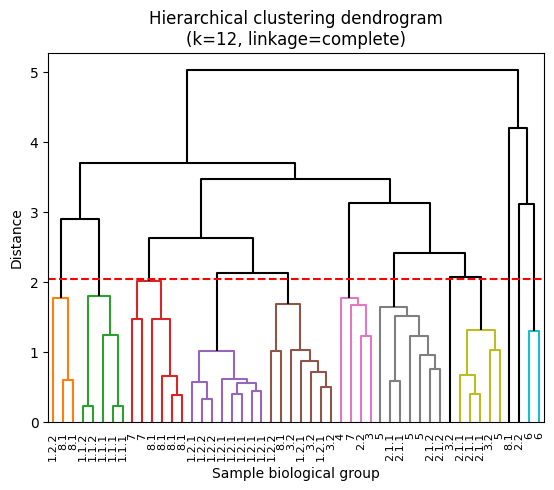

[ 1  1  1  1  1 10  8  8 10 10 10 10 10 10 10  3  8  4  7  7  7  4  4  4
  2  6  2  8  8  7 11  8  2  4  4  4  7  9  9  0  0  2  0  8  0  0  3  0
  3  5]
Singletons:  3
k=12, method=complete
Normalized Mutual Information Score: 0.6957743185952294
Adjusted Mutual Information Score: 0.4436797695097082
Rand Index: 0.893061224489796
Adjusted Rand Index: 0.32682425488180883


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


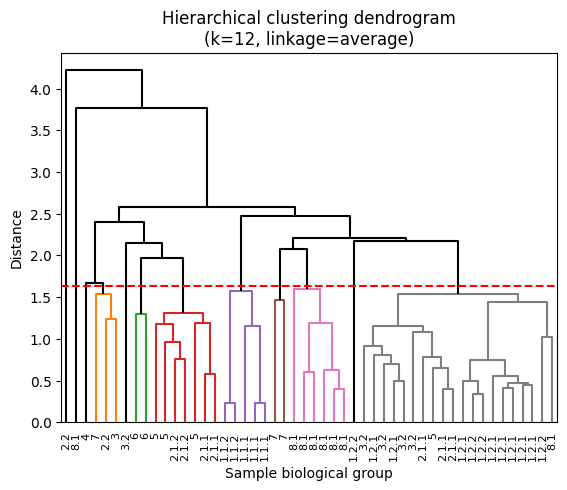

[ 1  1  1  1  1  4  4  4  4  4  4  4  4  4  4  7  4  6  4  4  4  6  6  6
  2  8  2  4  4  4  3  4 11  6  6  6  4 10 10  9  9  2  0  4  0  0  0  0
  0  5]
Singletons:  5
k=12, method=average
Normalized Mutual Information Score: 0.7101604720764785
Adjusted Mutual Information Score: 0.5030618187715693
Rand Index: 0.8310204081632653
Adjusted Rand Index: 0.31101051790706963


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


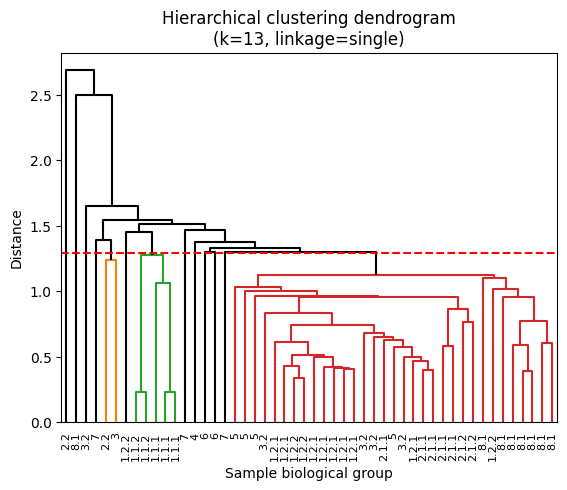

[ 0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  7  1  1  1  1  1  1  1  1
  2  8  2  1  1  1  9  1 10  1  1  1  1 12  4 11  6  3  1  1  1  1  1  1
  1  5]
Singletons:  10
k=13, method=single
Normalized Mutual Information Score: 0.6103151340756068
Adjusted Mutual Information Score: 0.36070315446503715
Rand Index: 0.6089795918367347
Adjusted Rand Index: 0.13029268646960562


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


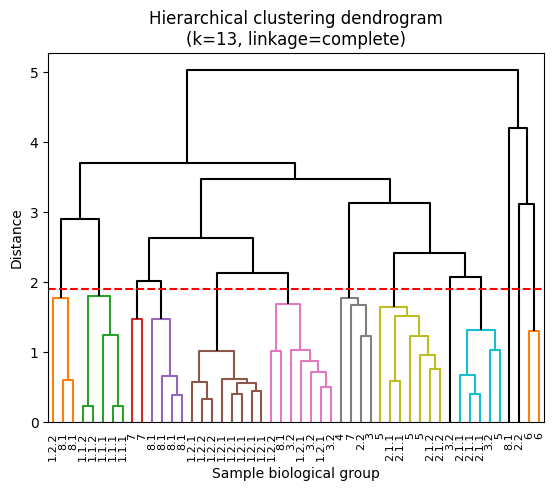

[ 0  0  0  0  0 10  3  3 10 10 10 10 10 10 10  1  3  4  7  7  7  4  4  4
  2  6  2  3  3  7 11  3  2  4  4  4  7  9  9  5  5  2  8  3  8  8  1  8
  1 12]
Singletons:  3
k=13, method=complete
Normalized Mutual Information Score: 0.716104154663968
Adjusted Mutual Information Score: 0.46348927944002494
Rand Index: 0.8995918367346939
Adjusted Rand Index: 0.3453268043431978


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


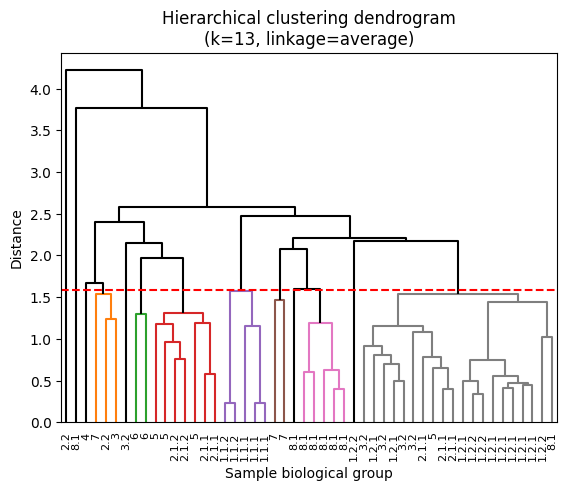

[ 0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  7  1  6  1  1  1  6  6  6
  2  8  2  1  1  1  3  1 11  6  6  6  1 10 10  4  4  2 12  1  9  9  9  9
  9  5]
Singletons:  6
k=13, method=average
Normalized Mutual Information Score: 0.7004860680927117
Adjusted Mutual Information Score: 0.47363075747324423
Rand Index: 0.8269387755102041
Adjusted Rand Index: 0.28436402916554143


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


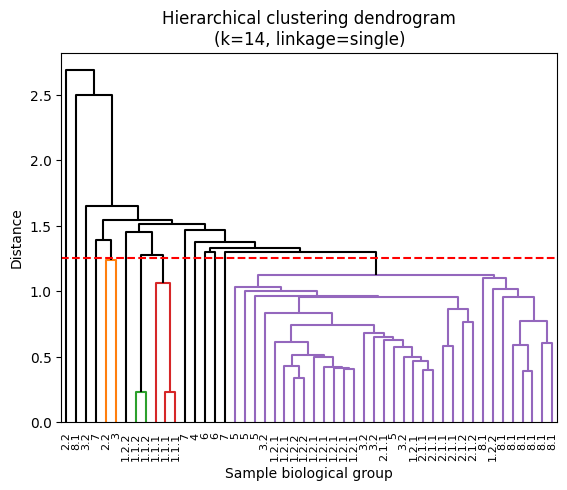

[ 2  2  2  6  6  1  1  1  1  1  1  1  1  1  1  7  1  1  1  1  1  1  1  1
  0  8  0  1  1  1  9  1 10  1  1  1  1 12  4 11 13  3  1  1  1  1  1  1
  1  5]
Singletons:  10
k=14, method=single
Normalized Mutual Information Score: 0.6315404583097185
Adjusted Mutual Information Score: 0.3751548708130281
Rand Index: 0.6138775510204082
Adjusted Rand Index: 0.13325514916074177


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


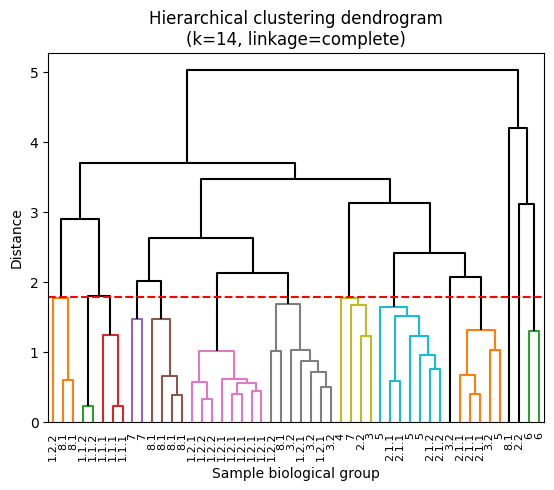

[ 8  8  8  6  6 10  1  1 10 10 10 10 10 10 10  0  1  4  7  7  7  4  4  4
  2 13  2  1  1  7 11  1  2  4  4  4  7  9  9  5  5  2  3  1  3  3  0  3
  0 12]
Singletons:  3
k=14, method=complete
Normalized Mutual Information Score: 0.733633327770001
Adjusted Mutual Information Score: 0.48097544790465124
Rand Index: 0.9044897959183673
Adjusted Rand Index: 0.36009625902428355


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


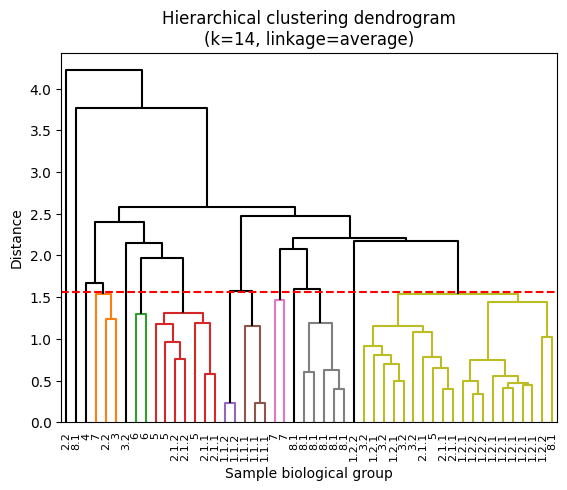

[10 10 10 13 13  0  0  0  0  0  0  0  0  0  0  7  0  6  0  0  0  6  6  6
  2  8  2  0  0  0  3  0 11  6  6  6  0  4  4  1  1  2 12  0  9  9  9  9
  9  5]
Singletons:  6
k=14, method=average
Normalized Mutual Information Score: 0.7188353824312983
Adjusted Mutual Information Score: 0.49033571500488204
Rand Index: 0.8318367346938775
Adjusted Rand Index: 0.2925824175824176


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


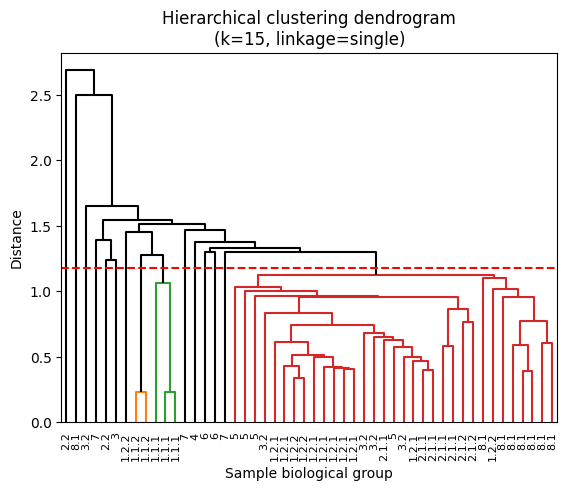

[ 2  2  2  6  6  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0
 14  8  3  0  0  0  9  0 10  0  0  0  0 12  4 11 13  1  0  0  0  0  0  0
  0  5]
Singletons:  12
k=15, method=single
Normalized Mutual Information Score: 0.640100118511686
Adjusted Mutual Information Score: 0.37973193956832246
Rand Index: 0.6146938775510205
Adjusted Rand Index: 0.13375422111290558


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


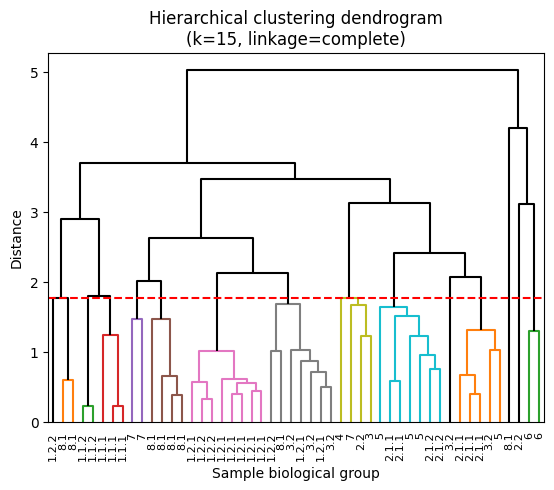

[ 8  8  8  6  6 10  1  1 10 10 10 10 10 10 10 14  1  4  7  7  7  4  4  4
  0 13  0  1  1  7 11  1  0  4  4  4  7  9  9  2  2  0  3  1  3  3  5  3
  5 12]
Singletons:  4
k=15, method=complete
Normalized Mutual Information Score: 0.743428282463177
Adjusted Mutual Information Score: 0.4901669578254449
Rand Index: 0.9061224489795918
Adjusted Rand Index: 0.36520203135349966


c:\Users\stefa\OneDrive\Documents\uni\master's\EIT\Aalto\methods_of_data_mining\groupwork\.venv\Lib\site-packages\scipy\cluster\hierarchy.py:3542: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ivl.append(labels[int(i - n)])


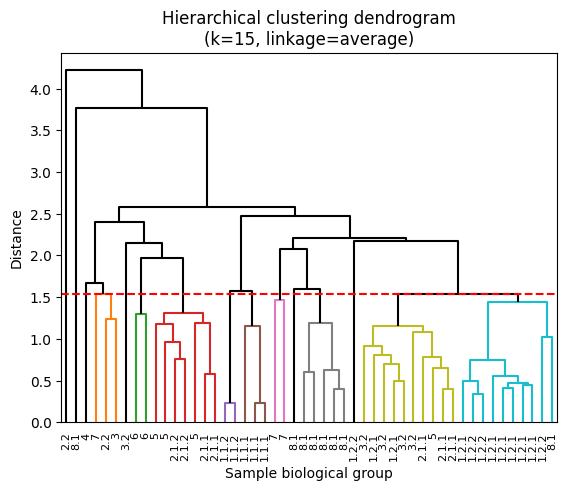

[10 10 10 13 13  2 14 14  2  2  2  2  2  2  2  7  2  6 14 14 14  6  6  6
  0  8  0 14 14 14  3 14 11  6  6  6 14  4  4  1  1  0 12  2  9  9  9  9
  9  5]
Singletons:  6
k=15, method=average
Normalized Mutual Information Score: 0.7529711694046173
Adjusted Mutual Information Score: 0.5269517143068676
Rand Index: 0.8938775510204081
Adjusted Rand Index: 0.37258687258687256


In [28]:
for k in range(5,16):
    for linkage_method in ['single', 'complete', 'average']:
        labels = hier_clust(mixed_distances, k, linkage_method)
        print(labels)
        print("Singletons: ",(np.unique(labels, return_counts=True)[1] == 1).sum())
        print(f"k={k}, method={linkage_method}")
        print(f"Normalized Mutual Information Score: {normalized_mutual_info_score(groups, labels, average_method='geometric')}")
        print(f"Adjusted Mutual Information Score: {adjusted_mutual_info_score(groups, labels, average_method='geometric')}")
        print(f"Rand Index: {rand_score(groups, labels)}")
        print(f"Adjusted Rand Index: {adjusted_rand_score(groups, labels)}")

### Subtask d

In [33]:
final_labels = AgglomerativeClustering(n_clusters=9, linkage='complete', compute_distances=True, metric='precomputed').fit_predict(mixed_distances)
birds['predicted_group'] = final_labels
birds['group'] = groups
birds

,AR,wload,back,belly,ftype,mean_wspan,mean_weight,BMI,WSI,group,group_ID,predicted_group
species,,,,,,,,,,,,
naurulokki,0.762605,0.060185,light grey,white,B,0.334204,0.022779,0.214481,0.879054,laridae,1.1.1,8
harmaalokki,0.785714,0.212963,bluish grey,white,B,0.558747,0.093394,0.343958,0.670654,laridae,1.1.1,8
isolokki,0.785714,0.222222,bluish grey,white,B,0.624021,0.125285,0.400416,0.671464,laridae,1.1.1,8
kalatiira,0.974790,0.027778,grey,white,B,0.242820,0.008884,0.000000,0.446080,sternidae,1.1.2,8
lapintiira,0.939076,0.009259,grey,white,B,0.224543,0.007745,0.015081,0.526316,sternidae,1.1.2,8
suokukko,0.468487,0.083333,dappled brown,white,C,0.099217,0.007745,0.144386,0.405667,scolopacidae,1.2.1,1
taivaanvuohi,0.296218,0.101852,dappled brown,white,C,0.070496,0.006834,0.109788,0.239971,scolopacidae,1.2.1,1
lehtokurppa,0.247899,0.166667,dappled brown,dappled beige,C,0.164491,0.025513,0.274415,0.306220,scolopacidae,1.2.1,1
karikukko,0.569328,0.125000,black-brown,white,C,0.091384,0.007745,0.222778,0.527379,scolopacidae,1.2.1,1


Describe clusters by numerical features.

In [34]:
birds[list(num_cols)+["predicted_group"]].groupby('predicted_group').agg(['mean', 'std'])

AR               wload           mean_wspan            \
                     mean       std      mean       std       mean       std   
predicted_group                                                                
0                0.467356  0.175619  0.458689  0.159375   0.197429  0.066246   
1                0.372829  0.201873  0.077469  0.047936   0.086162  0.064214   
2                0.410714  0.026155  0.376157  0.044627   0.756527  0.168515   
3                0.234944  0.040310  0.121142  0.075701   0.494778  0.110648   
4                0.966387  0.047537  0.837963  0.229155   0.403394  0.038771   
5                0.142857       NaN  0.231481       NaN   0.973890       NaN   
6                0.670168       NaN  0.912037       NaN   1.000000       NaN   
7                0.521008  0.115087  0.089506  0.030826   0.426458  0.227998   
8                0.849580  0.099259  0.106481  0.103107   0.396867  0.183818   

                mean_weight                 BMI                 WSI            
                       mean       std      mean       std      mean       std  
predicted_group                                                                
0                  0.056317  0.024808  0.447146  0.143636  0.229549  0.118791  
1                  0.008510  0.007211  0.158404  0.064178  0.406285  0.126465  
2                  0.320046  0.089845  0.447710  0.113120  0.320153  0.146938  
3                  0.084017  0.029668  0.273678  0.147528  0.490985  0.206567  
4                  0.186788  0.054765  0.704662  0.160457  0.277291  0.022317  
5                  0.498861       NaN  1.000000       NaN  0.776087       NaN  
6                  1.000000       NaN  0.639363       NaN  0.124245       NaN  
7                  0.042597  0.030610  0.279107  0.028794  0.953271  0.049797  
8                  0.051617  0.054210  0.194787  0.183820  0.638713  0.165527

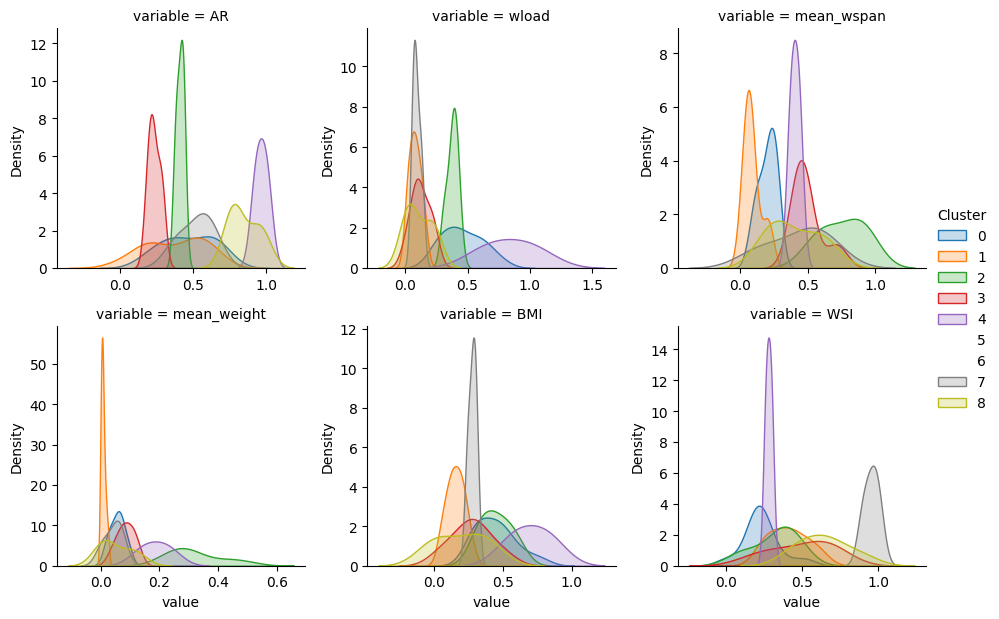

In [35]:
num_data = birds[list(num_cols) + ["predicted_group"]].copy()
df = pd.melt(num_data, num_data.columns[-1], num_data.columns[:-1])

g = sns.FacetGrid(
    df,
    col="variable",
    hue="predicted_group",
    col_wrap=3,
    height=8/2.54,
    sharex=False,
    sharey=False,
    legend_out=True
)
g.map(sns.kdeplot, "value", fill=True, warn_singular=False)
g.add_legend(title="Cluster")  
plt.show()

Describe clusters by categorical features.

In [36]:
for col in categ_cols:
    print(f"\nFeature: {col}")
    display(pd.crosstab(birds['predicted_group'], birds[col], normalize='index') * 100)


Feature: back


back,beige,black,black-brown,black-white,blackish grey,bluish grey,brown,brownish black,dappled brown,dark brown,grey,greyish black,greyish brown,light grey,white
predicted_group,,,,,,,,,,,,,,,
0,7.692308,15.384615,0.000000,0.0,15.384615,0.0,0.000000,7.692308,38.461538,7.692308,0.000000,7.692308,0.000000,0.000000,0.0
1,0.000000,6.666667,6.666667,0.0,0.000000,0.0,6.666667,0.000000,60.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.0
2,0.000000,25.000000,0.000000,25.0,0.000000,0.0,0.000000,0.000000,25.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.000000,0.000000,0.0,0.000000,0.0,16.666667,0.000000,16.666667,16.666667,16.666667,0.000000,16.666667,16.666667,0.0
4,0.000000,0.000000,0.000000,50.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.0
5,0.000000,0.000000,0.000000,0.0,0.000000,0.0,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
6,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0
7,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,33.333333,66.666667,0.000000,0.000000,0.000000,0.000000,0.0
8,0.000000,0.000000,0.000000,0.0,0.000000,40.0,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000,20.000000,0.0



Feature: belly


belly,beige,black,black-white,brown,brown-white,dappled beige,dappled brown,dark brown,dark grey,grey,greyish black,greyish white,light grey,reddish brown,white
predicted_group,,,,,,,,,,,,,,,
0,38.461538,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,15.384615,7.692308,0.000000,7.692308,0.000000,0.0,15.384615,15.384615
1,6.666667,0.000000,13.333333,0.000000,0.0,6.666667,6.666667,0.000000,0.000000,6.666667,0.000000,0.000000,0.0,0.000000,60.000000
2,0.000000,25.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000,25.0,0.000000,25.000000
3,0.000000,0.000000,16.666667,0.000000,50.0,0.000000,16.666667,0.000000,0.000000,0.000000,0.000000,16.666667,0.0,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,100.000000
5,0.000000,0.000000,0.000000,100.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,100.000000
7,0.000000,33.333333,0.000000,33.333333,0.0,0.000000,0.000000,33.333333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,100.000000



Feature: ftype


ftype,A,B,C
predicted_group,,,
0,0.000000,0.000000,100.000000
1,6.666667,0.000000,93.333333
2,25.000000,0.000000,75.000000
3,66.666667,33.333333,0.000000
4,0.000000,0.000000,100.000000
5,100.000000,0.000000,0.000000
6,0.000000,0.000000,100.000000
7,66.666667,0.000000,33.333333
8,0.000000,100.000000,0.000000
